### Library

In [1]:
!pip install selenium

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 6.3 MB 5.2 MB/s 
     |████████████████████████████████| 384 kB 53.4 MB/s 
     |████████████████████████████████| 140 kB 34.3 MB/s 
     |████████████████████████████████| 58 kB 2.9 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
requests 2.23.0 requires urllib3!=1.25.0,!=1.25.1,<1.26,>=1.21.1, but you have urllib3 1.26.13 which is incompatible.


In [2]:
!pip install webdriver-manager

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 127 kB 8.1 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.26.13
    Uninstalling urllib3-1.26.13:
      Successfully uninstalled urllib3-1.26.13
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
selenium 4.7.2 requires urllib3[socks]~=1.26, but you have urllib3 1.25.11 which is incompatible.


In [3]:
#jembatan skrip dengan browser
!apt-get install chromium-chromedriver

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  chromium-browser chromium-browser-l10n chromium-codecs-ffmpeg-extra
Suggested packages:
  webaccounts-chromium-extension unity-chromium-extension
The following NEW packages will be installed:
  chromium-browser chromium-browser-l10n chromium-chromedriver
  chromium-codecs-ffmpeg-extra
0 upgraded, 4 newly installed, 0 to remove and 20 not upgraded.
Need to get 95.6 MB of archives.
After this operation, 321 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic-updates/universe amd64 chromium-codecs-ffmpeg-extra amd64 108.0.5359.71-0ubuntu0.18.04.5 [1,159 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic-updates/universe amd64 chromium-browser amd64 108.0.5359.71-0ubuntu0.18

In [5]:
# Import Library
!pip3 install requests
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
import time
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.support.ui import WebDriverWait


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# gagal

In [ ]:
# 1. run browser

# chrome_options = Options()
# driver = webdriver.Chrome(executable_path='/usr/bin/chromedriver', options=chrome_options, service_args=['--verbose', '--log-path=/tmp/chromedriver.log'])

In [ ]:
# from selenium import webdriver
# from selenium.webdriver.edge.service import Service as EdgeService
# from webdriver_manager.microsoft import EdgeChromiumDriverManager

# browser = webdriver.Edge()

# driver = webdriver.Edge(service=EdgeService(EdgeChromiumDriverManager().install()))

# mulai

In [6]:
from selenium.webdriver.common import options
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument("--headless")
chrome_options.add_argument("--no-sandbox")#menambah previledge

driver = webdriver.Chrome(options=chrome_options)

In [ ]:
#Ngetes aja
driver.get('https://itb.ac.id')
print(driver.title)

Beranda - Institut Teknologi Bandung


In [16]:
# 2. Input URL
# linkyt = input("Masukan link: ")
elem = driver.get(input('link youtube:'))
time.sleep(2)
#https://www.youtube.com/watch?v=LsgPpH6YK9o
#https://www.youtube.com/watch?v=FCltgGLSt3Q

link youtube:https://www.youtube.com/watch?v=5Gnlj8nzNrQ


In [17]:
# 3. Pointer ke komentar
driver.find_element(By.XPATH, "/html/body/ytd-app/div/ytd-page-manager/ytd-watch-flexy/div/div/div/div/ytd-comments").location_once_scrolled_into_view

{'x': 0, 'y': 0}

In [18]:
# 4. scroll bawah sampai semua commet ke load

prev_size = 0
size_rendered_comment = 1
elem_scroll = driver.find_element(By.XPATH, "/html/body/ytd-app/ytd-third-party-manager")
while(prev_size != size_rendered_comment):
    prev_size = size_rendered_comment
    elem_scroll.location_once_scrolled_into_view
    time.sleep(2)
    size_rendered_comment = len(driver.find_elements(By.XPATH, "/html/body/ytd-app/div[1]/ytd-page-manager/ytd-watch-flexy/div[5]/div[1]/div/div[2]/ytd-comments/ytd-item-section-renderer/div[3]/ytd-comment-thread-renderer"))


In [19]:
comments = driver.find_elements(By.XPATH, "/html/body/ytd-app/div[1]/ytd-page-manager/ytd-watch-flexy/div[5]/div[1]/div/div[2]/ytd-comments/ytd-item-section-renderer/div[3]/ytd-comment-thread-renderer")
key = 1
comments_and_replies = []

for comment in comments:
  comments_and_replies.append(comment.find_element(By.XPATH,"ytd-comment-renderer/div[3]/div[2]/div[2]/ytd-expander/div/yt-formatted-string").text)

try:
  reply_elem = comment.find_element(By.XPATH, "div/ytd-comment-replies-renderer/div[1]/div[1]/div[1]/ytd-button-renderer")
  reply_elem.click()
  time.sleep(2)

except:
  pass
  print('Exception')
print(len(comments_and_replies))

Exception
1036


In [20]:
replies_elem = driver.find_elements(By.XPATH, "/html/body/ytd-app/div[1]/ytd-page-manager/ytd-watch-flexy/div[5]/div[1]/div/div[2]/ytd-comments/ytd-item-section-renderer/div[3]/ytd-comment-thread-renderer/div/ytd-comment-replies-renderer/div[1]/div[2]/div[1]/ytd-comment-renderer/div[3]/div[2]/div[2]/ytd-expander/div/yt-formatted-string")
for reply_elem in replies_elem:
  comments_and_replies.append(reply_elem.text)
print(len(comments_and_replies))

1036


### data processing

In [21]:
import pandas as pd
df = pd.DataFrame(comments_and_replies)
df.columns=['text']

In [22]:
df

,text
0,Terima kasih Hyundai Motors Indonesia telah be...
1,"sdh liat review dari Mat Watson Carwow, dan sk..."
2,"Fun fact: ""relax mode"" yang disebut Om Fitra d..."
3,Hyundai spertinya susah dikejar dalam perlomba...
4,Keren.. semoga di tahun2 mendatang semakin ban...
...,...
1031,5:25 baret halus yaa
1032,Om mobi ngapain tuh
1033,Bentruk
1034,Saya melihat penampakan


In [23]:
namecsv = input('name csv: ')
df.to_csv(namecsv, index = False, header = True,index_label=None)

name csv: ioniq5-otodriver2


In [ ]:
from nltk.tokenize import word_tokenize

In [ ]:
def tokenizingText(text):
    text = word_tokenize(text)
    return text

In [ ]:
import nltk
nltk.download('punkt')
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
 def filteringText(text): # Remove stopwors in a text
    listStopwords = stopwords.words('indonesian')
    listStopwords.extend(['dengan', 'ia','bahwa','oleh','aku', 'kamu'
                                    'list',' " ','ya','yuk','kak','yg','po','gak',
                                    'ke','bgt','lg','gw','aja','gini','wik','kalo','ga',
                                    'dom','yah','gada','nya','jdi','sih','gue','gua','dah',
                                    'ni','lu','ayo','vs','v'])
    listStopwords = set(listStopwords)
    filtered = []
    for txt in text:
        if txt not in listStopwords:
            filtered.append(txt)
    text = filtered             
    return text

In [ ]:
df['text_preprocessed'] = df['text'].apply(tokenizingText)
df['text_preprocessed'] = df['text_preprocessed'].apply(filteringText)
df['text_preprocessed']=df['text_preprocessed'].apply(', '.join)

In [ ]:
df

,text,text_preprocessed
0,"Umur saya hampir 30 tahun, baru sekarang kekum...","Umur, 30, ,, kekumpul, modal, kuliah, sistem, ..."
1,Mamteb nih. Banyak wawasan yg baru ku tau meng...,"Mamteb, nih, ., Banyak, wawasan, ku, tau, data..."
2,The point of this conversation is you can do i...,"The, point, of, this, conversation, is, you, c..."
3,Ceritanya saya lagi buat data performa penjual...,"Ceritanya, data, performa, penjualan, Sales, ,..."
4,Saran agar hostnya mencari info/ riset dulu tt...,"Saran, hostnya, mencari, info/, riset, ttg, da..."
...,...,...
94,"Nah yang saya pertanyakan, bisa gak ka lulusan...","Nah, ,, ka, lulusan, SMK, /, SMA, teknik, info..."
95,suaranya ga sinkron ya? apa cuma laptop saya?,"suaranya, sinkron, ?, laptop, ?"
96,Kayaknya saya tau akun instagram host nya,"Kayaknya, tau, akun, instagram, host"
97,"""Memulai awal karir di IBM""\nMe : Dah lah. Sto...","``, Memulai, karir, IBM, '', Me, :, Dah, ., St..."


In [ ]:
# 6. Export to CSV
namecsv = input("nama file:")
df.to_csv(namecsv+'.csv')

nama file:tes2


menggabungkan

In [ ]:
df_1 = pd.read_csv(input("Masukan file csv 1: "))
df_2 = pd.read_csv(input("Masukan file csv 2: "))

Masukan file csv 1: tes1.csv
Masukan file csv 2: tes2.csv


In [ ]:
from functools import reduce
df_mix=[df_1, df_2]
df_merged = reduce(lambda  left,right: pd.merge(left,right,how='outer'), df_mix)

In [ ]:
df_merged

,Unnamed: 0,text,text_preprocessed
0,0,Semua jurusan ada data analyst saat kuliah ter...,"Semua, jurusan, data, analyst, kuliah, tugas, ..."
1,1,data analyst tergantung dari perusahaan yang m...,"data, analyst, tergantung, perusahaan, membutu..."
2,2,kak ada hal2 tertentu ga sih yg harus dilakuin...,"hal2, dilakuin, mahasiswa, statistika, biar, d..."
3,3,memiliki insting yang kuat sangat menopang pek...,"memiliki, insting, kuat, menopang, pekerjaan, ..."
4,4,Bismillah.. saya dari jurusan statistika mudah...,"Bismillah, .., jurusan, statistika, mudah-muda..."
...,...,...,...
155,94,"Nah yang saya pertanyakan, bisa gak ka lulusan...","Nah, ,, ka, lulusan, SMK, /, SMA, teknik, info..."
156,95,suaranya ga sinkron ya? apa cuma laptop saya?,"suaranya, sinkron, ?, laptop, ?"
157,96,Kayaknya saya tau akun instagram host nya,"Kayaknya, tau, akun, instagram, host"
158,97,"""Memulai awal karir di IBM""\nMe : Dah lah. Sto...","``, Memulai, karir, IBM, '', Me, :, Dah, ., St..."


In [ ]:
from wordcloud import WordCloud, STOPWORDS
from PIL import Image

Word Cloud Comment


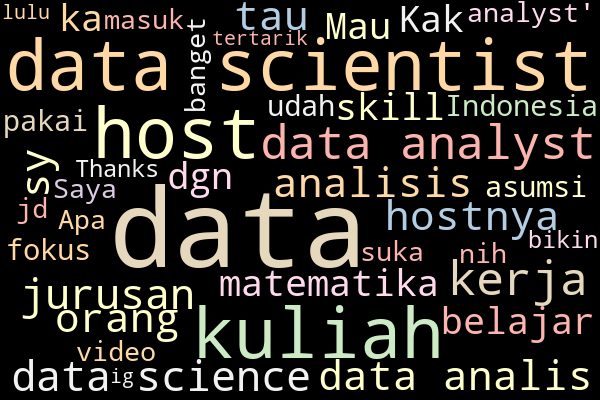

In [ ]:
def create_wordcloud_all(text):
    #mask = np.array(Image.open("../input/cloudpng/cloud.png"))
    stopwords = set(STOPWORDS)
    wc = WordCloud(background_color="black",
    colormap='Pastel1',
    width = 600, height = 400,
    max_words=40,
    stopwords=stopwords,
    repeat=True)
    wc.generate(str(text))
    wc.to_file("wc.png")
    print("Word Cloud Comment")
    path="wc.png"
    display(Image.open(path))

create_wordcloud_all(df_merged['text_preprocessed'].values)